## Question 2:
##### Dataset: Air quality of an Italian city (https://archive.ics.uci.edu/ml/datasets/Air+quality)
##### The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multi Sensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Missing values are tagged with -200 values.

##### Your objective is to predict the Relative Humidity of a given point of time based on all other attributes affecting the change in RH.

##### (i) Perform the data pre-processing steps on the dataset as explained in the class. Handle missing values, get insights from correlation matrix and deal with outliers.

##### (ii) Split the dataset into a 85:15 ratio into training and test dataset using the sklearn library.

##### (iii) Train a linear regression model from scratch using only numpy, pandas and matplotlib and train a linear regression model using the sklearn library on the training dataset.

##### (iv) Calculate the r2 score and mean squared error using the test dataset. Compare the results obtained and plot your results.


Mean Squared Error on Test Set (Scratch Linear Regression): 12.181309521540726
R2 Score (Scratch Linear Regression): 0.48848445249457706
Mean Squared Error on Test Set (Sklearn Linear Regression): 5.941532487113903
R2 Score (Sklearn Linear Regression): 0.8783063734087221


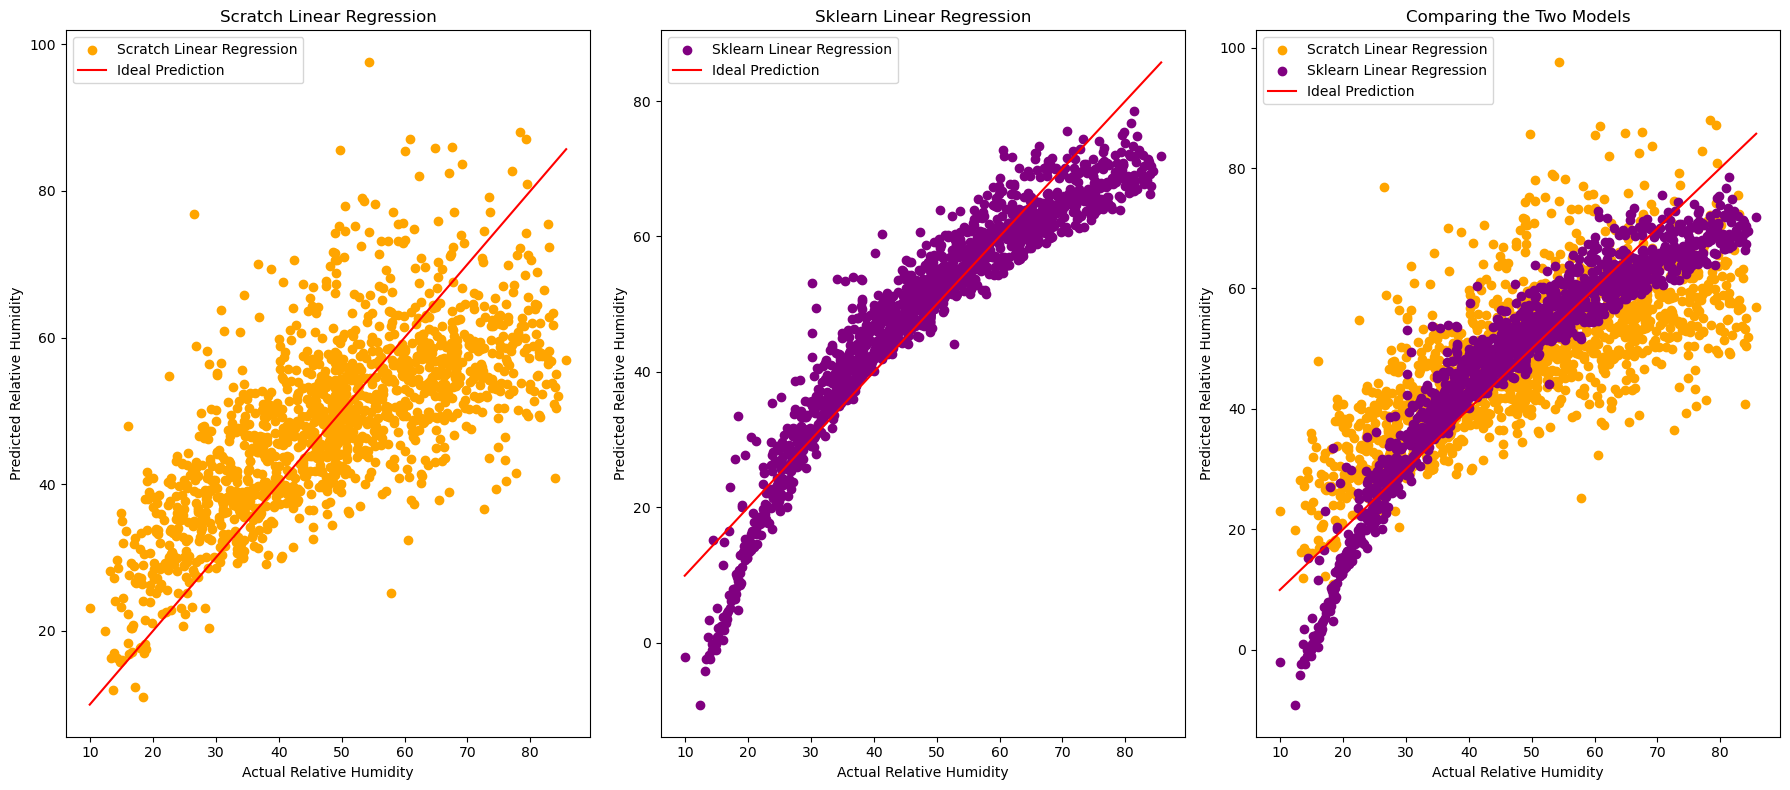

In [24]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Reading data from Excel file
df = pd.read_excel('AirQualityUCI.xlsx')
# Replacing -200 with NaN
df = df.replace(-200, np.nan)

# Handling missing values by replacing them with the mean of each column
for i in range(2, 15):
    df.iloc[:, i].fillna(int(df.iloc[:, i].mean()), inplace=True)

# Computing correlation matrix and sorting correlations with 'RH' in descending order
num_col = df.select_dtypes(include=['float64', 'int64']).columns
matrix = df[num_col].corr()
RH_corr = matrix['RH'].sort_values(ascending=False)
"""print(RH_corr)"""

# Dropping unnecessary columns
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

# Function to remove outliers using Z-score method
def remove_outliers_zscore(df, feature, z_score_threshold=5):
    mean_value = df[feature].mean()
    std_dev = df[feature].std()

    # Calculating Z-scores
    df['z_score'] = (df[feature] - mean_value) / std_dev

    # Identifying and removing outliers
    outliers = df[abs(df['z_score']) > z_score_threshold]
    df_no_outliers = df[abs(df['z_score']) <= z_score_threshold]

    # Displaying information about removed outliers
    """print("Number of outliers removed:", len(outliers))
    print("Z-Score Threshold:", z_score_threshold)"""

    return df_no_outliers.drop(columns=['z_score'])

# Removing outliers from selected columns
df_no_outliers = remove_outliers_zscore(df, 'NOx(GT)')
df_no_outliers = remove_outliers_zscore(df, 'CO(GT)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S1(CO)')
df_no_outliers = remove_outliers_zscore(df, 'NMHC(GT)')
df_no_outliers = remove_outliers_zscore(df, 'C6H6(GT)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S2(NMHC)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S3(NOx)')
df_no_outliers = remove_outliers_zscore(df, 'NO2(GT)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S4(NO2)')
df_no_outliers = remove_outliers_zscore(df, 'PT08.S5(O3)')

# Importing necessary packages for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Separating features and target variable
X = df.drop(columns='RH')
Y = df['RH']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# Cost function for linear regression
def cost(y_hat, y_train):
    l = (y_hat - y_train) ** 2
    cost = l.mean()
    return cost

# Initializing weights for gradient descent
W = np.zeros(X_train.shape[1])

# Gradient descent function
def gradient_descent(X_train, y_train, W, learning_rate, num_epochs):
    L = []  # List to store cost values for visualization
    for _ in range(num_epochs):
        y_hat = np.dot(X_train, W)
        errors = y_hat - y_train
        gradient = np.dot(X_train.T, errors) / len(y_train)
        W -= learning_rate * gradient
        L.append(cost(y_hat, y_train))

    return W, L

# Hyperparameters for gradient descent
learning_rate = 0.0000003
num_epochs = 50000

# Calling Gradient Descent function
W, L = gradient_descent(X_train, y_train, W, learning_rate, num_epochs)

# Model evaluation for manually implemented linear regression
y_hat_t = np.dot(X_test, W)

# Importing necessary packages for linear regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Training linear regression model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
mse1 = mean_squared_error(y_test, y_hat_t)
rmse1 = np.sqrt(mse1)
print("Mean Squared Error on Test Set (Scratch Linear Regression):", rmse1)
r2_1 = r2_score(y_test, y_hat_t)
print("R2 Score (Scratch Linear Regression):", r2_1)

mse2 = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mse2)
print("Mean Squared Error on Test Set (Sklearn Linear Regression):", rmse2)
r2_2 = r2_score(y_test, y_pred)
print("R2 Score (Sklearn Linear Regression):", r2_2)

# Plotting the results
import matplotlib.pyplot as plt

# Creating subplots for visualizing model predictions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))

# Scatter plot for manually implemented linear regression
axes[0].scatter(y_test, y_hat_t, color='orange', label='Scratch Linear Regression')
axes[0].set_xlabel("Actual Relative Humidity")
axes[0].set_ylabel("Predicted Relative Humidity")
axes[0].set_title("Scratch Linear Regression")
axes[0].legend()

# Ideal Prediction line for Manual Linear Regression
# x_line = np.linspace(min(y_test), max(y_test), 100)
# y_line = x_line
# axes[0].plot(x_line, y_line, color='red', label='Ideal Prediction')
# axes[0].legend()

# Scatter plot for scikit-learn linear regression
axes[1].scatter(y_test, y_pred, color='purple', label='Sklearn Linear Regression')
axes[1].set_xlabel("Actual Relative Humidity")
axes[1].set_ylabel("Predicted Relative Humidity")
axes[1].set_title("Sklearn Linear Regression")
axes[1].legend()

# Ideal Prediction line for Sklearn Linear Regression
# axes[1].plot(x_line, y_line, color='red', label='Ideal Prediction')
# axes[1].legend()

# Scatter plot of actual vs predicted values for the third plot
axes[2].scatter(y_test, y_hat_t, color='orange', label='Scratch Linear Regression')
axes[2].scatter(y_test, y_pred, color='purple', label='Sklearn Linear Regression')
axes[2].set_xlabel("Actual Relative Humidity")
axes[2].set_ylabel("Predicted Relative Humidity")
axes[2].set_title("Comparing the Two Models")
axes[2].legend()

# Ideal Prediction line for the combined plot
# axes[2].plot(x_line, y_line, color='red', label='Ideal Prediction')
# axes[2].legend()

# Adjusting layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
